In [1]:
import matplotlib.pyplot as plt
import wandb

from seisLM.utils import plot_utils, project_path

In [2]:
wandb.login()
api = wandb.Api()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


wandb: Currently logged in as: tliu. Use `wandb login --relogin` to force relogin


In [3]:
MAX_SAMPLES = 100_000
keys = ["val/avg_contrastive_loss", "val/avg_diversity_loss"]


seisLM_base_run_paths = {
  "SeisLM_base": "tliu/pretrained_seisLM/pretrain_config_std_norm_single_ax_8_datasets_sample_pick_false_42__2024-08-31-18h-41m-44s",
  "SeisLM_large": "tliu/pretrained_seisLM/pretrain_config_std_norm_single_ax_8_datasets_32bit_scaleup_samp_false_42__2024-09-01-23h-26m-07s",
}


history_dict = {}
for name, path in seisLM_base_run_paths.items():
  run = api.run(path)
  history = run.history(samples=MAX_SAMPLES, keys=keys)

  assert len(history) <= MAX_SAMPLES
  history_dict[name] = history

In [4]:
kwargs = {
  "SeisLM_base": {
    "color": "#74c476",
    "marker": "^",
    "ls": "--",
    "markevery": 5,
  },
  "SeisLM_large": {"color": "#006d2c", "marker": "s", "markevery": 5},
}

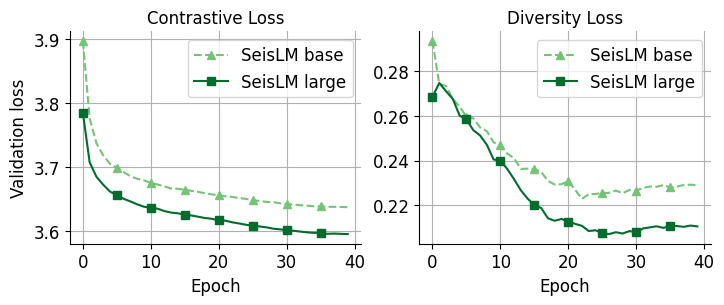

In [8]:
a4_width = 8.27
fig_width = a4_width
fig_height = fig_width / 2 / 1.5
marker_size = 20

FONT_SIZE = 12
# Create figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(fig_width, fig_height))
plt.rcParams.update(
  {
    "font.size": FONT_SIZE,  # General font size
    "axes.titlesize": FONT_SIZE,  # Subplot titles
    "figure.titlesize": FONT_SIZE,  # Suptitle (main title)
    "legend.fontsize": FONT_SIZE,  # Legend font size
    "pdf.fonttype": 42,  # Embed fonts in PDF for better compatibility
  }
)


for key, val in history_dict.items():
  axes[0].plot(
    val["val/avg_contrastive_loss"].dropna(),
    label=key.replace("_", " "),
    **kwargs[key],
  )
  axes[1].plot(
    val["val/avg_diversity_loss"].dropna(),
    label=key.replace("_", " "),
    **kwargs[key],
  )

axes[0].legend()
axes[0].grid()


axes[1].legend()
axes[1].grid()

axes[0].set_title("Contrastive Loss")
axes[1].set_title("Diversity Loss")
axes[0].set_xlabel("Epoch")
axes[1].set_xlabel("Epoch")
axes[0].set_ylabel("Validation loss")

fig.savefig(
  project_path.FIGURE_DIR + "/pretrain_loss.pdf",
  # project_path.FIGURE_DIR + f'/pretrain_loss.png',
  bbox_inches="tight",
)

for ax in axes:
  plot_utils.simpleaxis(ax)
